In this notebook we create few plots of wind intensity measured by satellite, with a particular interest on the Canary Islands, which frequently generate the so-called *von Karman* vortex street.

In [1]:
import datetime
import re
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import filament
import logging
import copy
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
myproj = ccrs.PlateCarree()
coast = cfeature.GSHHSFeature(scale="f")
from importlib import reload
reload(filament)

<module 'filament' from '/home/ctroupin/Projects/FNRS-UpwellingFilaments/Filament-Submesoscale/python/filament.py'>

In [2]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("Starting")

INFO:root:Starting


## Input parameters
We set the date of interest and the domain coordinates are taken from the geoTIFF file.

In [3]:
year, month, day = 2020, 2, 9
figdir = "../figures/wind/NorthSea"
visibledir = "/data/Visible/NorthSea/"
os.path.isdir(visibledir)
if not(os.path.exists(figdir)):
    os.mkdir(figdir)

## Data

In [4]:
datewind = datetime.datetime(year, month, day)
dayofyear = datewind.timetuple().tm_yday

### Visible image

In [5]:
visibleim = datewind.strftime("viirs-%Y-%m-%dT00_00_00Z.tiff")
#visibleim = datewind.strftime("Sentinel-3_OLCI_%Y-%m-%d.tiff")
#visibleim = datewind.strftime("Sentinel-2_L1C_%Y-%m-%d.tiff")
#visibleim = datewind.strftime("Terra-%Y-%m-%dT00_00_00Z.tiff")
if os.path.exists(os.path.join(visibledir, visibleim)):
    print("Reading geoTIFF file {}".format(visibleim))
    vis = filament.Visible()
    vis.read_geotiff(os.path.join(visibledir, visibleim))
else:
    logger.warn("No visible image, specify domain coordinates")

Reading geoTIFF file viirs-2020-02-09T00_00_00Z.tiff


In [6]:
extent2 = copy.deepcopy(vis.extent)
extent2[0] -= 360.
extent2[1] -= 360.

### Scatterometer wind
The wind (netCDF) are read from the JPL OPEnDAP server.      
The files are sorted by years and days of year.

With these pieces of information we can create a list of files URLs.

In [7]:
filelist1 = filament.get_filelist_url(year, dayofyear)

INFO:Filament:Found 28 files


In [8]:
filelist2 = ["/data/Wind/ASCAT/Atlantic/ascat_20200209_194800_metopa_69062_eps_o_coa_3202_ovw.l2.nc.gz"]

In [47]:
reload(filament)

<module 'filament' from '/home/ctroupin/Projects/FNRS-UpwellingFilaments/Filament-Submesoscale/python/filament.py'>

In [49]:
filelistclean = []
for ifile, dataurl in enumerate(filelist2):

    logger.info("Working on {}".format(dataurl))
    wind = filament.Wind()
    res = wind.read_ascat(dataurl, vis.extent)
    
    if res:
        filelistclean.append(dataurl)
        mm = str(month).zfill(2)
        dd = str(day).zfill(2)
        
        fname = "".join(("aqua-", dataurl.split("/")[-1].split(".")[0], ".jpg"))
        logger.info("Saving figure as {}".format(fname))
        figname = os.path.join(figdir, fname)
        
        fig = plt.figure(figsize=(8, 8))
        ax = plt.subplot(111, projection=myproj)
        vis.add_to_plot(ax, myproj)
        wind.add_to_plot(fig, ax, domain=vis.extent, cmap=plt.cm.hot,
                         clim=[0, 25], vis=True, quivscale=500, quivwidth=0.001,
                         date=wind.time.strftime("%Y-%m-%d %H:%M"))
        filament.decorate_map(ax, vis.extent, 
                              np.arange(-19., -13., 2.), 
                              np.arange(27., 29.5, 1.))
        #plt.show()
        plt.savefig(figname, dpi=300, bbox_inches="tight")
        plt.close()
logger.info("Figures printer in {}".format(figdir))

INFO:root:Working on /data/Wind/ASCAT/Atlantic/ascat_20200209_194800_metopa_69062_eps_o_coa_3202_ovw.l2.nc.gz
INFO:Filament:Subsetting data to region of interest
INFO:root:Saving figure as aqua-ascat_20200209_194800_metopa_69062_eps_o_coa_3202_ovw.jpg
INFO:root:Figures printer in ../figures/wind/NorthSea


### Specific plot Canary Islands

In [10]:
places = {"Cruz Tejeda": (-15.599804, 28.005904),
          "Teide": (-16.642337, 28.272777),
          "El Hierro": (-18.040556, 27.729444),
          "La Gomera": (-17.248383, 28.109636)}

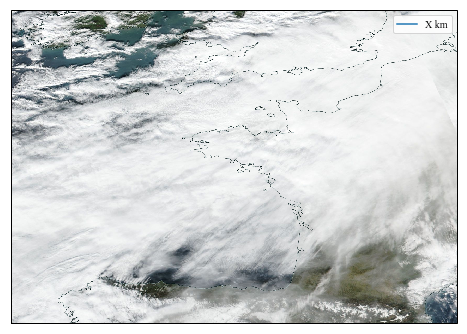

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection=myproj)
vis.add_to_plot(ax, myproj)
filament.decorate_map(ax, vis.extent, 
                      np.arange(-19., -13., 2.), 
                      np.arange(27., 29.5, 1.))
ax.plot((places["Cruz Tejeda"][0], places["El Hierro"][0]),
        (places["Cruz Tejeda"][1], places["El Hierro"][1]), label="X km")
ax.plot((places["Cruz Tejeda"][0], places["La Gomera"][0]),
        (places["Cruz Tejeda"][1], places["La Gomera"][1]))
ax.plot((places["Cruz Tejeda"][0], places["Teide"][0]),
        (places["Cruz Tejeda"][1], places["Teide"][1]))

plt.legend()
    
plt.show()
#plt.savefig(figname, dpi=300, bbox_inches="tight")
plt.close()